# PART 3

In [1]:
import re
import nltk
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("https://raw.githubusercontent.com/vavaidya/TextAnalytics/branch-vikrant/HW1/results_recent.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5000, 3)


,Date,user_id,comments
0,"June 12, 2019 2:41PM",marcogallo1986,Do you GC not bad because back in November aw...
1,"June 12, 2019 3:00PM",suydam,But the Tacoma would not help with your gas co...
2,"June 12, 2019 3:03PM",Michaell,"I'm about ready to cross the 16,000 mile thres..."
3,"June 12, 2019 3:05PM",28firefighter,"@nyccarguy From my perspective, the miles you ..."
4,"June 12, 2019 3:09PM",tjc78,I wouldn't mind a Q sedan at all. I know peopl...
5,"June 12, 2019 3:54PM",sda,I think your Intrigue with the 3.5 Shortstar s...
6,"June 12, 2019 3:59PM",stickguy,"Bradd, the Honcker deal earlier this year was ..."
7,"June 12, 2019 4:08PM",nyccarguy,28firefighter said:\n@nyccarguy From my perspe...
8,"June 12, 2019 4:09PM",andres3,28firefighter said:\nshow previous quotes\n\n\...
9,"June 12, 2019 4:11PM",stickguy,selling something like that you just breath a ...


In [3]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [7]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 12, 2019 2:41PM",marcogallo1986,do you gc not bad because back in november awe...
1,"June 12, 2019 3:00PM",suydam,but the tacoma would not help with your gas co...
2,"June 12, 2019 3:03PM",Michaell,im about ready to cross the 16000 mile thresho...
3,"June 12, 2019 3:05PM",28firefighter,nyccarguy from my perspective the miles you pu...
4,"June 12, 2019 3:09PM",tjc78,i wouldnt mind a q sedan at all i know people ...


In [8]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words
0,"June 12, 2019 2:41PM",marcogallo1986,do you gc not bad because back in november awe...,"[because, do, not, awesome, bad, gc, in, you, ...","{because, do, awesome, not, bad, gc, in, you, ...","[awesome, bad, gc, back, november]"
1,"June 12, 2019 3:00PM",suydam,but the tacoma would not help with your gas co...,"[gas, would, the, not, tacoma, with, your, but...","{gas, would, the, not, with, your, but, proble...","[gas, would, problem, help, toyota, consumption]"
2,"June 12, 2019 3:03PM",Michaell,im about ready to cross the 16000 mile thresho...,"[about, ready, outback, jetta, mile, the, cros...","{subaru, payment, about, ready, ha, mile, the,...","[subaru, payment, ready, ha, mile, cross, volk..."
3,"June 12, 2019 3:05PM",28firefighter,nyccarguy from my perspective the miles you pu...,"[comfort, piece, my, things, faults, from, q40...","{piece, my, from, ha, q40, you, reliability, t...","[piece, ha, q40, reliability, car, one, better..."
4,"June 12, 2019 3:09PM",tjc78,i wouldnt mind a q sedan at all i know people ...,"[enclave, my, wouldnt, bad, cant, sedan, that,...","{my, wouldnt, bad, cant, sedan, that, q, at, t...","[wouldnt, bad, cant, sedan, q, technology, bui..."


In [9]:
data.reset_index(inplace  = True)

In [10]:
word_bag = []
for i in range(data.shape[0]):
    word_bag += data['comments_final_words'][i]

#word_bag

word_freq = nltk.FreqDist(word_bag)

In [11]:
rslt = pd.DataFrame(word_freq.most_common(500),              
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,said,1923
1,’,1361
2,car,1352
3,wa,1329
4,like,1195


In [26]:
model_list = list(models["Brand"].drop_duplicates())
top_10_brands = rslt[rslt["Word"].isin(model_list)].reset_index(drop='True')[:10]
top_10_brands

,Word,Frequency
0,audi,312
1,honda,297
2,volkswagen,296
3,chevrolet,277
4,subaru,247
5,toyota,230
6,acura,221
7,volvo,210
8,bmw,197
9,hyundai,170


In [27]:
def check_co_occ(brand_A,brand_B,post):
    if(brand_A in post and brand_B in post):
        return 1;
    else:
        return 0;



In [28]:
comments = data['comments_final_words']


co_exist_num = {}
#model_list = list(models["Brand"].drop_duplicates())
model_list = list(top_10_brands['Word'])
for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B] = 0



In [29]:
for comment in comments:
    for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B]+=check_co_occ(brand_A,brand_B,comment)
        

In [30]:
mat = pd.DataFrame.from_dict(co_exist_num, orient = 'index').values.reshape(10,10)
df = pd.DataFrame(mat).set_index(pd.Series(top_10_brands['Word']))
df.columns = top_10_brands['Word']
df

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,312,47,59,21,19,9,27,33,23,16
honda,47,297,40,19,28,44,49,29,24,25
volkswagen,59,40,296,26,31,20,21,18,18,29
chevrolet,21,19,26,277,6,29,6,8,8,17
subaru,19,28,31,6,247,21,31,24,21,19
toyota,9,44,20,29,21,230,13,10,13,19
acura,27,49,21,6,31,13,221,40,19,12
volvo,33,29,18,8,24,10,40,210,21,19
bmw,23,24,18,8,21,13,19,21,197,11


In [31]:
N=len(comments)
lift=df

for i in range(10):
    for j in range(10):
        lift.iloc[i,j]=N*df.iloc[i,j]/(top_10_brands['Frequency'].iloc[i]*top_10_brands['Frequency'].iloc[j])
lift

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,15.977564,2.528436,3.184717,1.211295,1.229043,0.625209,1.952010,2.510760,1.865401,1.503771
honda,2.528436,16.784512,2.268177,1.151284,1.902698,3.210950,3.721453,2.317861,2.044814,2.468311
volkswagen,3.184717,2.268177,16.841216,1.580764,2.113675,1.464454,1.600297,1.443533,1.538791,2.872913
chevrolet,1.211295,1.151284,1.580764,17.996390,0.437159,2.269110,0.488590,0.685577,0.730818,1.799639
subaru,1.229043,1.902698,2.113675,0.437159,20.182186,1.842721,2.830985,2.306536,2.151401,2.255656
toyota,0.625209,3.210950,1.464454,2.269110,1.842721,21.673913,1.274936,1.032091,1.430258,2.422379
acura,1.952010,3.721453,1.600297,0.488590,2.830985,1.274936,22.556561,4.296488,2.175506,1.592228
volvo,2.510760,2.317861,1.443533,0.685577,2.306536,1.032091,4.296488,23.738095,2.530457,2.653081
bmw,1.865401,2.044814,1.538791,0.730818,2.151401,1.430258,2.175506,2.530457,25.304569,1.637354


In [32]:
lift_diss=1/lift

for i in range(10):
    lift_diss.iloc[i,i]=0
lift_diss

Word,audi,honda,volkswagen,chevrolet,subaru,toyota,acura,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,0.000000,0.395501,0.314000,0.825562,0.813641,1.599465,0.512292,0.398286,0.536078,0.664995
honda,0.395501,0.000000,0.440883,0.868595,0.525570,0.311434,0.268712,0.431432,0.489042,0.405135
volkswagen,0.314000,0.440883,0.000000,0.632606,0.473110,0.682849,0.624884,0.692745,0.649861,0.348079
chevrolet,0.825562,0.868595,0.632606,0.000000,2.287496,0.440701,2.046707,1.458626,1.368330,0.555667
subaru,0.813641,0.525570,0.473110,2.287496,0.000000,0.542676,0.353234,0.433551,0.464813,0.443330
toyota,1.599465,0.311434,0.682849,0.440701,0.542676,0.000000,0.784353,0.968907,0.699174,0.412817
acura,0.512292,0.268712,0.624884,2.046707,0.353234,0.784353,0.000000,0.232748,0.459663,0.628051
volvo,0.398286,0.431432,0.692745,1.458626,0.433551,0.968907,0.232748,0.000000,0.395186,0.376920
bmw,0.536078,0.489042,0.649861,1.368330,0.464813,0.699174,0.459663,0.395186,0.000000,0.610741


In [34]:
mat_lift=lift_diss.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')


dissimilarity = lift_diss
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_


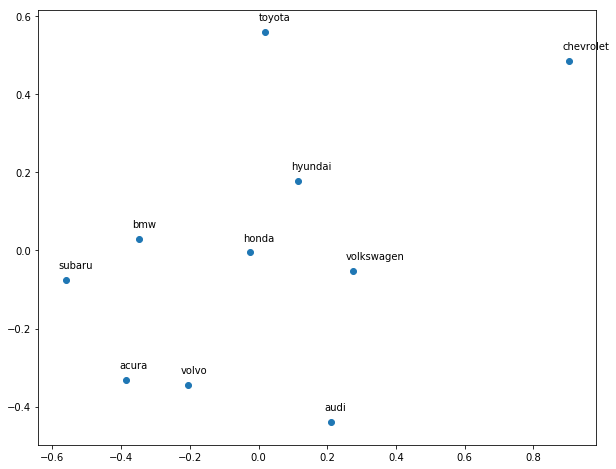

In [35]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=lift.columns.values
plt.scatter(x, y)
for i in range(10):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()